In [1]:
# 비지도 학습 기반 군집 분류 분석 (Kmeans군집 분류 분석) 
#오늘 목표, 포켓몬 데이터 능력치에 따라서, 비지도 학습 기반 군집 분류 분석 및 해석 및 평가를 한다. 
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [143]:
#지도 학습 기반 분류 분석을 하기 위한 데이터 전처리 
#데이터 타입 변경 

df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)
preprocessed_df= df[['Type 1', 'Type 2' ,'Total', 'HP','Attack','Defense', 'Sp. Atk','Sp. Def', 'Speed', 'Generation', 'Legendary' ]]

preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


In [144]:
#원핫인코딩
encoded_df=pd.get_dummies(preprocessed_df['Type 1'])
encoded_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    object
 12  Legendary   800 non-null    int32 
dtypes: int32(1), int64(8), object(4)
memory usage: 78.2+ KB


In [146]:
#pokemon type list 생성 

def make_list(x1, x2):
    type_list =[]
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2)
    return type_list

preprocessed_df['Type']=preprocessed_df.apply(lambda x: make_list(x['Type 1'], x['Type 2']), axis=1)
preprocessed_df.head()

C:\Users\hongm\anaconda3\envs\ck\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Fire,NaN,309,39,52,43,60,50,65,1,0,[Fire]


In [147]:
del preprocessed_df['Type 1']
del preprocessed_df['Type 2']
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,309,39,52,43,60,50,65,1,0,[Fire]


In [148]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Total       800 non-null    int64 
 1   HP          800 non-null    int64 
 2   Attack      800 non-null    int64 
 3   Defense     800 non-null    int64 
 4   Sp. Atk     800 non-null    int64 
 5   Sp. Def     800 non-null    int64 
 6   Speed       800 non-null    int64 
 7   Generation  800 non-null    object
 8   Legendary   800 non-null    int32 
 9   Type        800 non-null    object
dtypes: int32(1), int64(7), object(2)
memory usage: 59.5+ KB


k: 1 | cost: 1599.999999999999
k: 2 | cost: 853.3477298974246
k: 3 | cost: 643.3631598164479
k: 4 | cost: 480.49450250321513
k: 5 | cost: 404.26211230954635


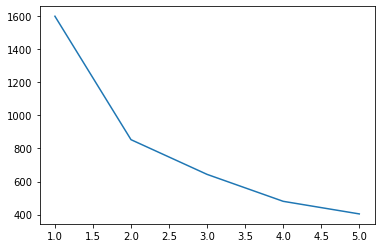

In [192]:
# Kmeans 군집분류 

from sklearn.cluster import KMeans

#K-means train & Elbow method

X= preprocessed_df[['Attack', 'Defense']]

k_list=[]
cost_list= []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

In [193]:
# selected by elbow method (4)
kmeans = KMeans(n_clusters=4).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,3
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,3
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [194]:
print(preprocessed_df['cluster_num'].value_counts())

3    309
1    253
2    128
0    110
Name: cluster_num, dtype: int64


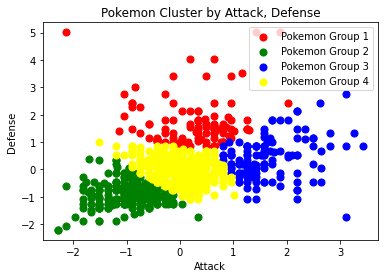

In [195]:
#군집 시각화 

plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 0]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 0]['Defense'], 
            s = 50, c = 'red', label = 'Pokemon Group 1')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 1]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 1]['Defense'], 
            s = 50, c = 'green', label = 'Pokemon Group 2')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 2]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 2]['Defense'], 
            s = 50, c = 'blue', label = 'Pokemon Group 3')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 3]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 3]['Defense'], 
            s = 50, c = 'yellow', label = 'Pokemon Group 4')
plt.title('Pokemon Cluster by Attack, Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

k: 1 | cost: 4799.999999999998
k: 2 | cost: 3275.381233030599
k: 3 | cost: 2862.0579224953945
k: 4 | cost: 2566.9748669936234
k: 5 | cost: 2328.0758816130333
k: 6 | cost: 2181.59293040769
k: 7 | cost: 2070.506803093987
k: 8 | cost: 1955.8542615067258
k: 9 | cost: 1852.5218201495888
k: 10 | cost: 1768.2353537256047
k: 11 | cost: 1716.2766537191076
k: 12 | cost: 1639.7200058789374
k: 13 | cost: 1596.8307325220583
k: 14 | cost: 1537.630978384855


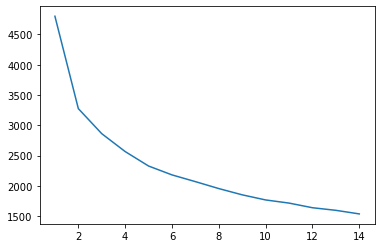

In [196]:
#다차원 군집 분석 
from sklearn.cluster import KMeans

# K-means train & Elbow method
X = preprocessed_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

k_list = []
cost_list = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

In [199]:
# selected by elbow method (5)
kmeans = KMeans(n_clusters=5).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,3
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,3
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,4
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,0


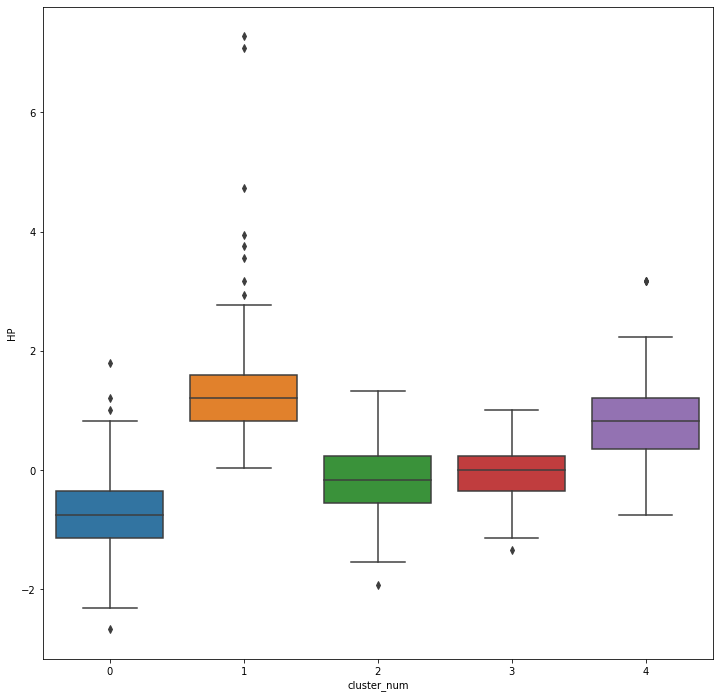

In [200]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "HP", data=preprocessed_df, ax=ax)
plt.show()

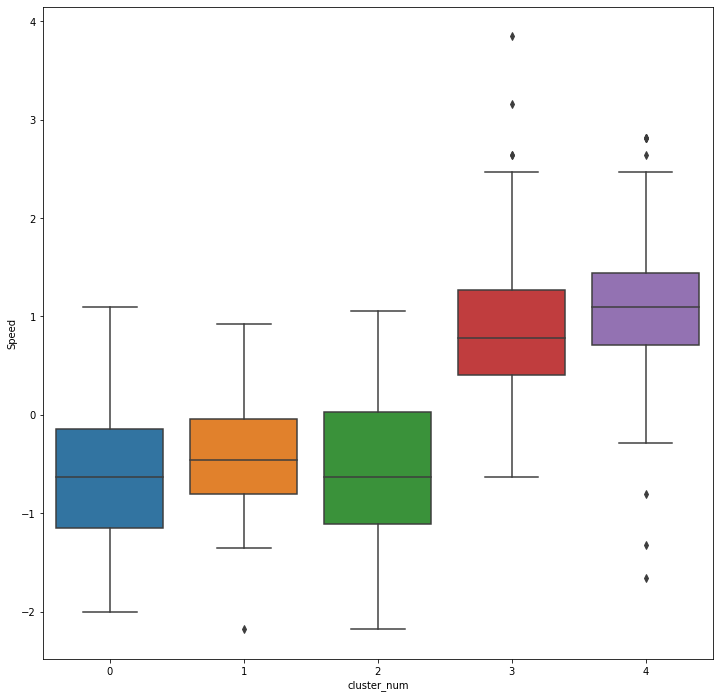

In [201]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Speed", data=preprocessed_df, ax=ax)
plt.show()

In [ ]:
#결과적으로 군집들의 분포가 나누기 이전과의 분포가 다르고, 각 군집마다의 특성을 가지고 있다. 군집이 특성대로 잘 나누어진것을 알수 있다. 
